# Welcome!
Below, we will learn to implement and train a policy to play atari-pong, using only the pixels as input. We will use convolutional neural nets, multiprocessing, and pytorch to implement and train our policy. Let's get started!

In [1]:
# install package for displaying animation
!pip install JSAnimation

# custom utilies for displaying animation, collecting rollouts and more
import pong_utils

%matplotlib inline

# check which device is being used. 
# I recommend disabling gpu until you've made sure that the code runs
device = pong_utils.device
print("using device: ",device)

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "c:\users\1\anaconda3\envs\qb_ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2672, in version
    return self._version
  File "c:\users\1\anaconda3\envs\qb_ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _version

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\1\anaconda3\envs\qb_ml\lib\site-packages\pip\_internal\commands\install.py", line 524, in _warn_about_conflicts
    package_set, _dep_info = check_install_conflicts(to_install)
  File "c:\users\1\anaconda3\envs\qb_ml\lib\site-packages\pip\_internal\operations\check.py", line 108, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
  File "c:\users\1\anaconda3\envs\qb_ml\lib\site-packages\pip\_internal\operations\check.py", line 47, in create_pac

using device:  cuda:0


In [2]:
# render ai gym environment
import gym
import time

# PongDeterministic does not contain random frameskip
# so is faster to train than the vanilla Pong-v4 environment
env = gym.make('PongDeterministic-v4')

print("List of available actions: ", env.unwrapped.get_action_meanings())

# we will only use the actions 'RIGHTFIRE' = 4 and 'LEFTFIRE" = 5
# the 'FIRE' part ensures that the game starts again after losing a life
# the actions are hard-coded in pong_utils.py

List of available actions:  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


# Preprocessing
To speed up training, we can simplify the input by cropping the images and use every other pixel



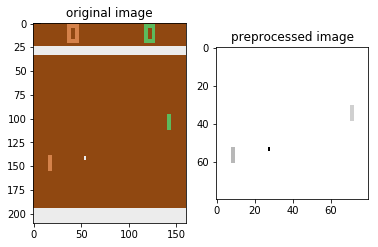

In [3]:
import matplotlib
import matplotlib.pyplot as plt

# show what a preprocessed image looks like
env.reset()
_, _, _, _ = env.step(0)
# get a frame after 20 steps
for _ in range(20):
    frame, _, _, _ = env.step(1)

plt.subplot(1,2,1)
plt.imshow(frame)
plt.title('original image')

plt.subplot(1,2,2)
plt.title('preprocessed image')

# 80 x 80 black and white image
plt.imshow(pong_utils.preprocess_single(frame), cmap='Greys')
plt.show()



# Policy

## Exercise 1: Implement your policy
 
Here, we define our policy. The input is the stack of two different frames (which captures the movement), and the output is a number $P_{\rm right}$, the probability of moving left. Note that $P_{\rm left}= 1-P_{\rm right}$

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F



# set up a convolutional neural net
# the output is the probability of moving right
# P(left) = 1-P(right)
class Policy(nn.Module):

    def __init__(self):
        super(Policy, self).__init__()
        
        
    ########
    ## 
    ## Modify your neural network
    ##
    ########
        
        # 80x80 to outputsize x outputsize
        # outputsize = (inputsize - kernel_size + stride)/stride 
        # (round up if not an integer)

        # output = 20x20 here
        self.conv_1 = nn.Conv2d(2, 1, kernel_size=4, stride=4)
        self.size_1=1*20*20
        
        self.conv_2= nn.Conv2d(1,1,kernel_size=4,stride=4)
        self.size_2=1*5*5
        
        # 1 fully connected layer
        self.fc_1 = nn.Linear(self.size_2, 64)
        self.fc_2 = nn.Linear(64,64)
        self.fc_3 = nn.Linear(64,1)
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        
    ########
    ## 
    ## Modify your neural network
    ##
    ########
    
        x = F.relu(self.conv_1(x))
        x = F.relu(self.conv_2(x))
        # flatten the tensor
        x = x.view(-1,self.size_2)
        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        return self.sig(self.fc_3(x))

# use your own policy!
policy=Policy().to(device)


policy=pong_utils.Policy().to(device)

# we use the adam optimizer with learning rate 2e-4
# optim.SGD is also possible
import torch.optim as optim
optimizer = optim.Adam(policy.parameters(), lr=1e-4)

In [5]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F



# # set up a convolutional neural net
# # the output is the probability of moving right
# # P(left) = 1-P(right)
# class Policy(nn.Module):

#     def __init__(self):
#         super(Policy, self).__init__()
        
        
#     ########
#     ## 
#     ## Modify your neural network
#     ##
#     ########
        
#         # 80x80 to outputsize x outputsize
#         # outputsize = (inputsize - kernel_size + stride)/stride 
#         # (round up if not an integer)

#         # output = 20x20 here
#         self.conv = nn.Conv2d(2, 1, kernel_size=4, stride=4)
#         self.size=1*20*20
        
#         # 1 fully connected layer
#         self.fc = nn.Linear(self.size, 1)
#         self.sig = nn.Sigmoid()
        
#     def forward(self, x):
        
#     ########
#     ## 
#     ## Modify your neural network
#     ##
#     ########
    
#         x = F.relu(self.conv(x))
#         # flatten the tensor
#         x = x.view(-1,self.size)
#         return self.sig(self.fc(x))


# # run your own policy!
# # policy=Policy().to(device)
# policy=pong_utils.Policy().to(device)

# # we use the adam optimizer with learning rate 2e-4
# # optim.SGD is also possible
# import torch.optim as optim
# optimizer = optim.Adam(policy.parameters(), lr=1e-4)

# Game visualization
pong_utils contain a play function given the environment and a policy. An optional preprocess function can be supplied. Here we define a function that plays a game and shows learning progress


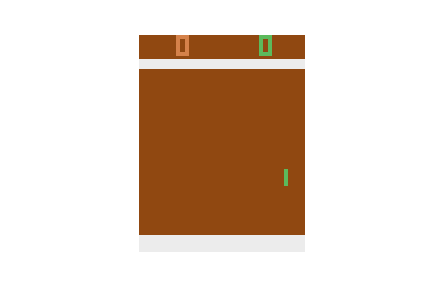
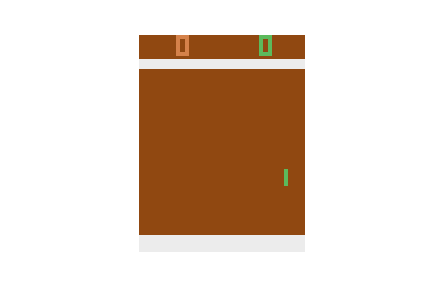
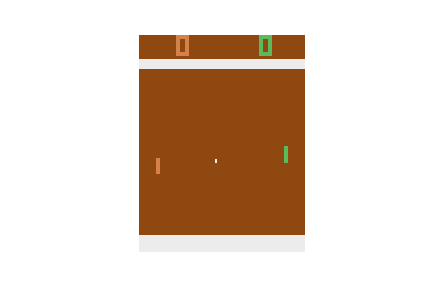
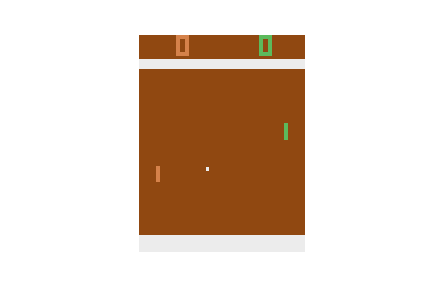
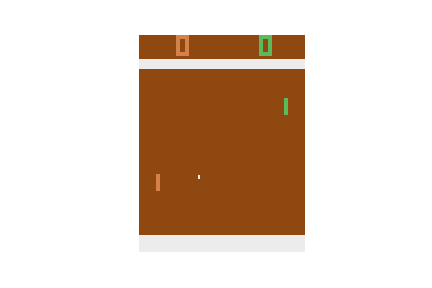
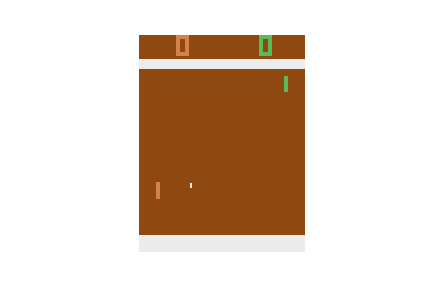
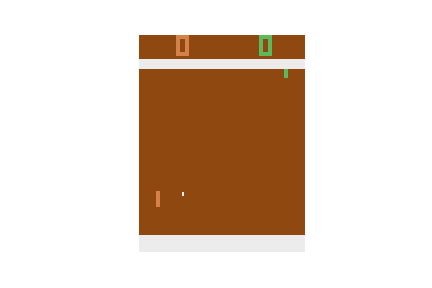
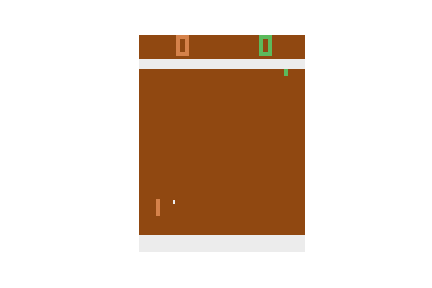
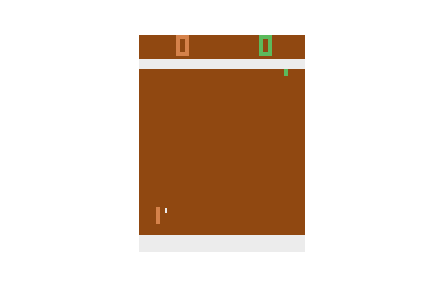
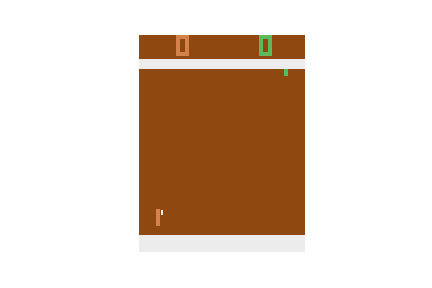
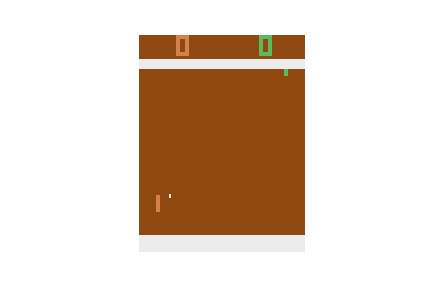
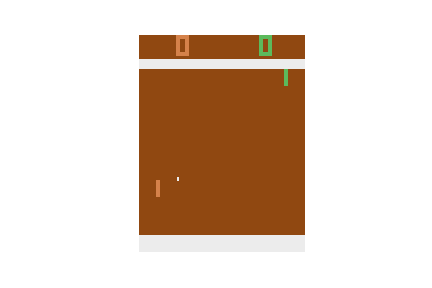
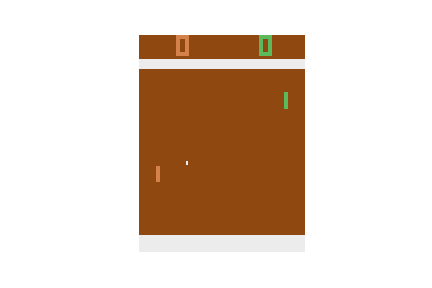
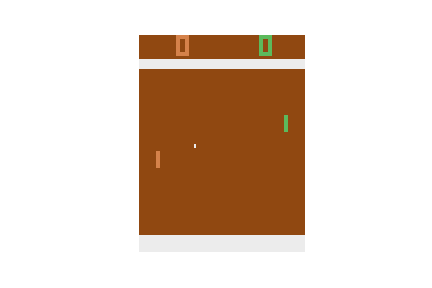
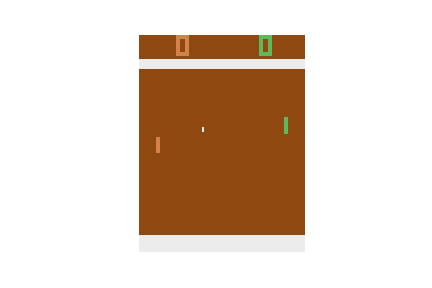
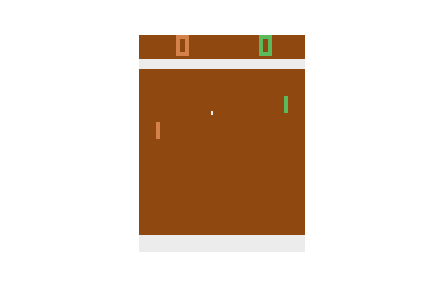
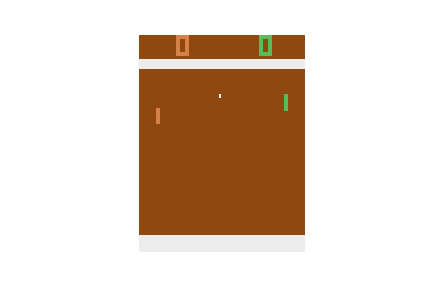
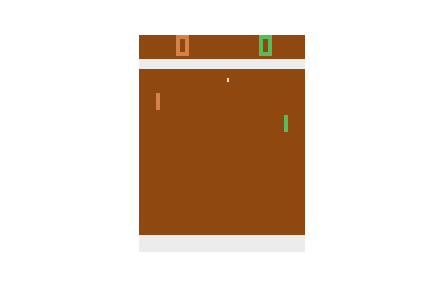
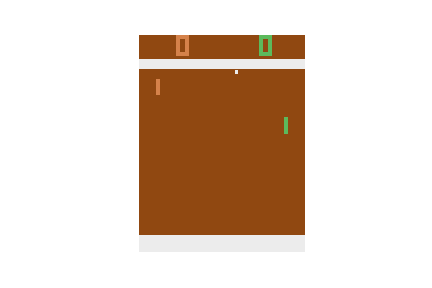
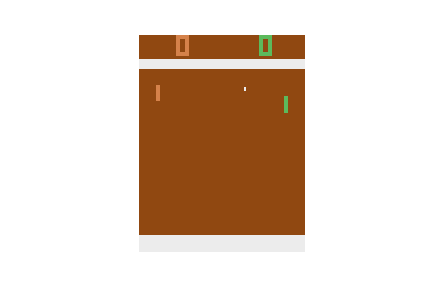
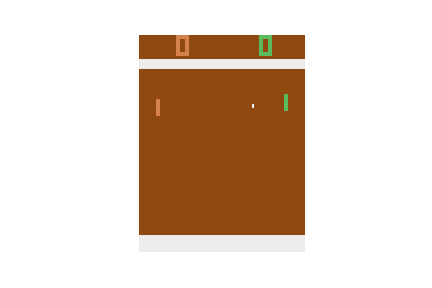
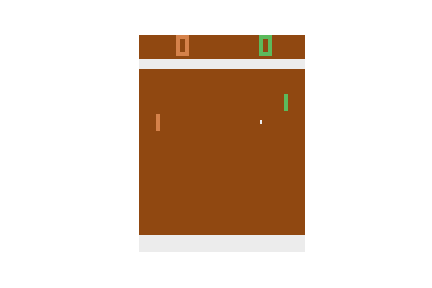
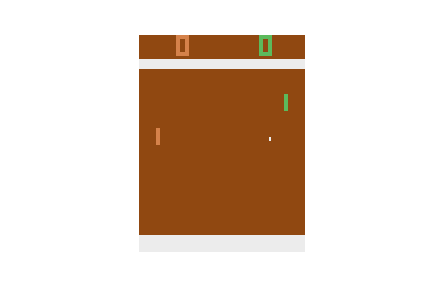
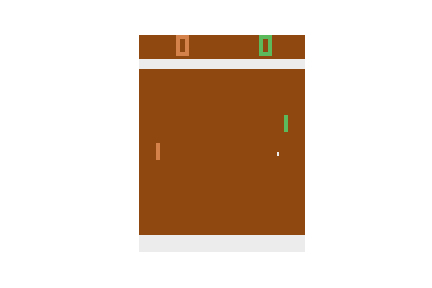
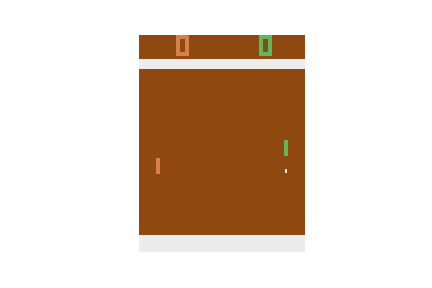
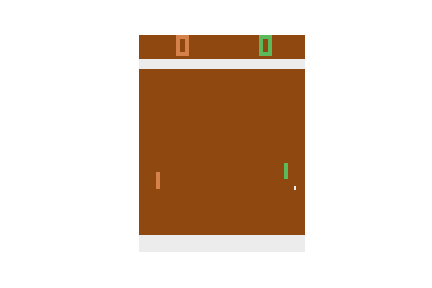
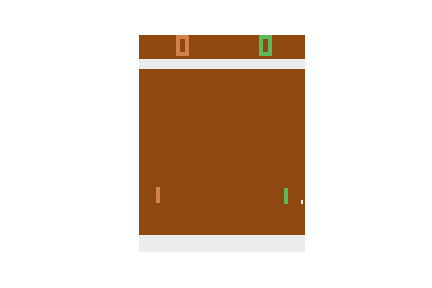
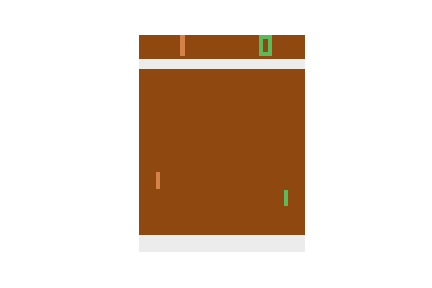
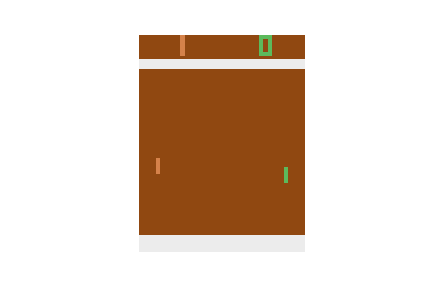
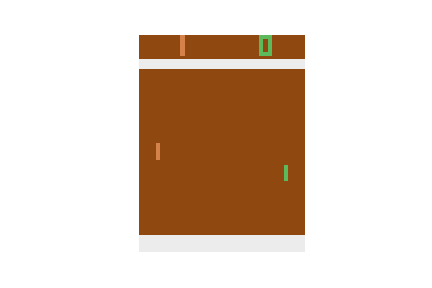
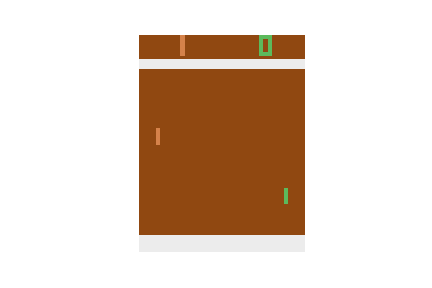
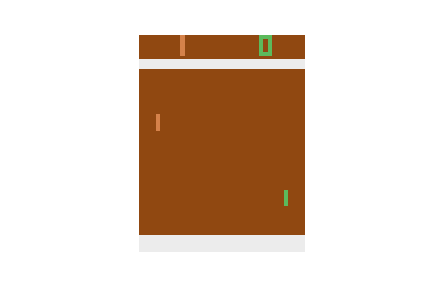
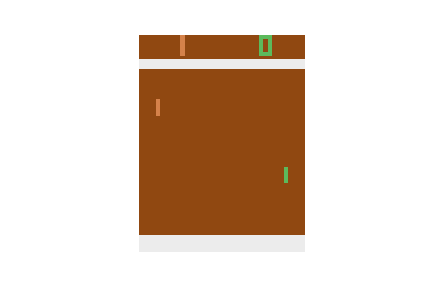
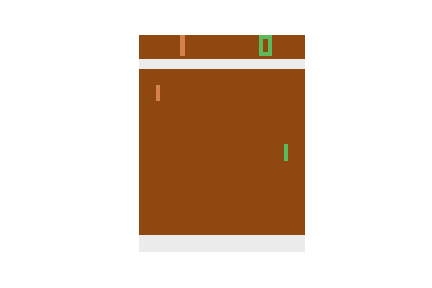
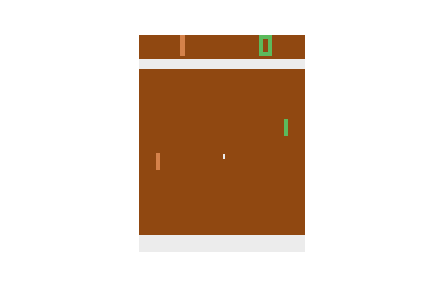
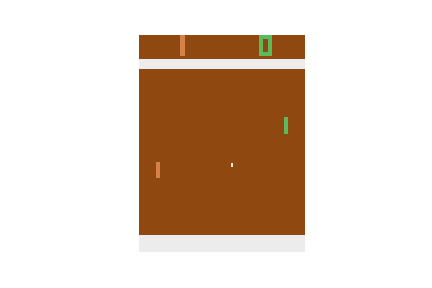
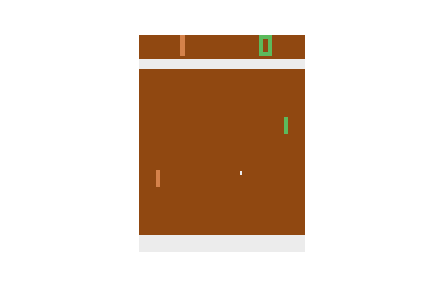
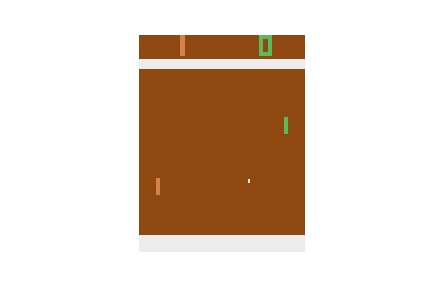
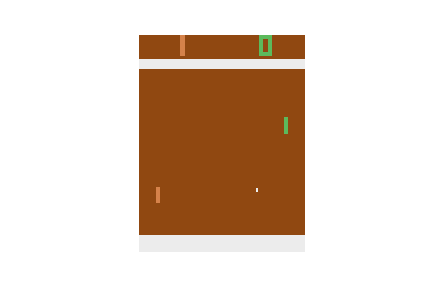
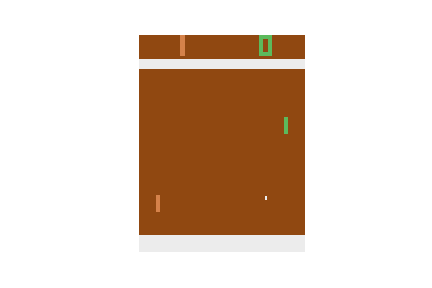
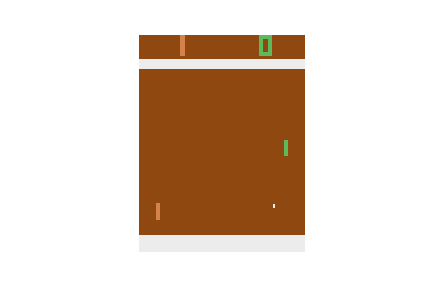
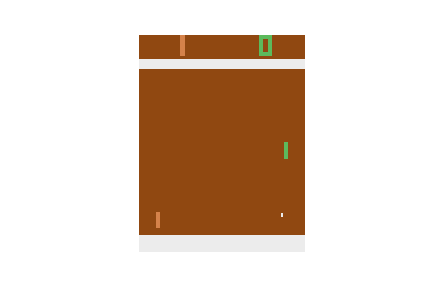
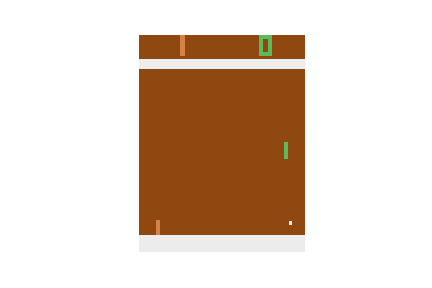
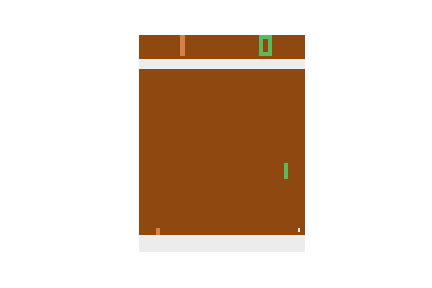
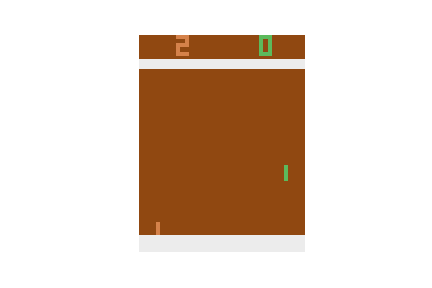
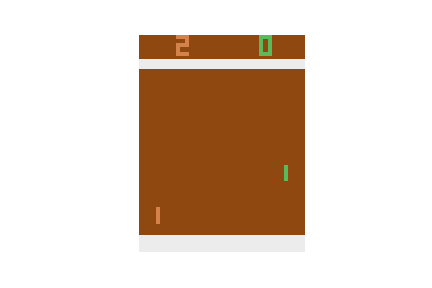
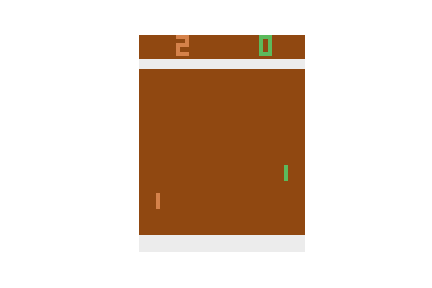
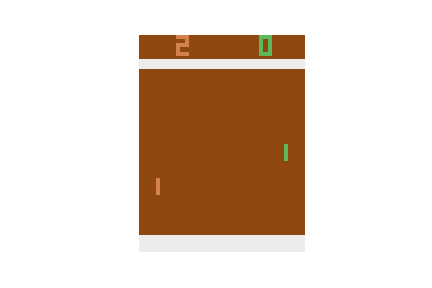
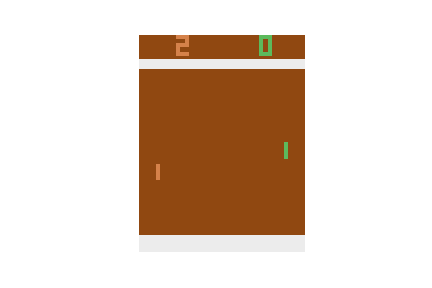
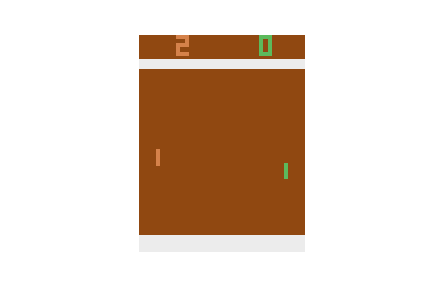
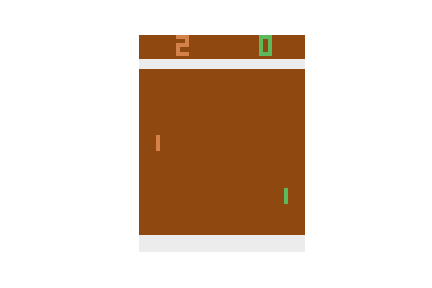
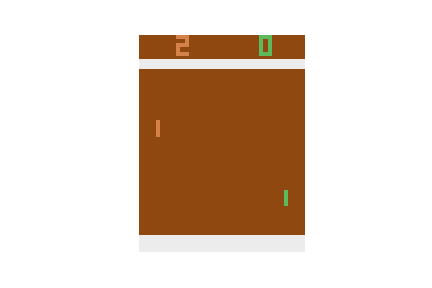
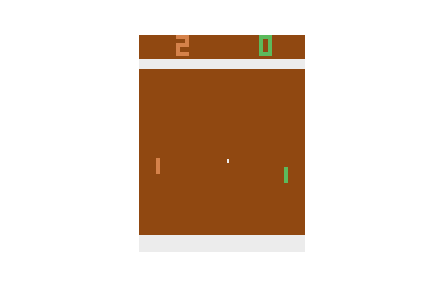
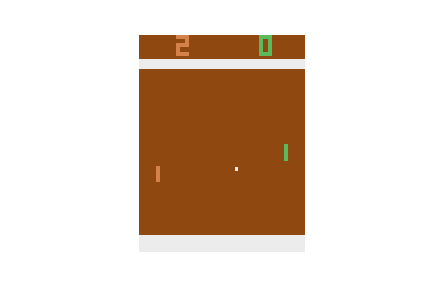
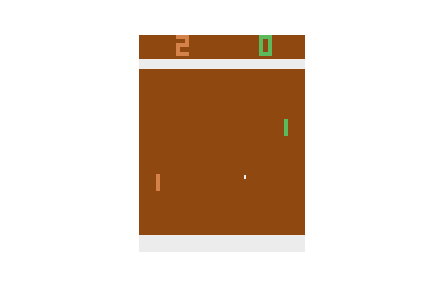
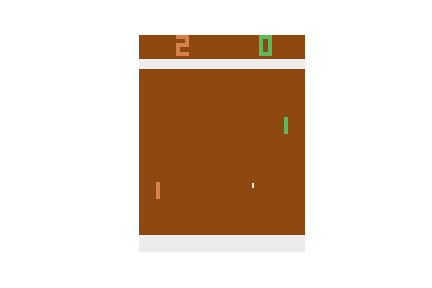
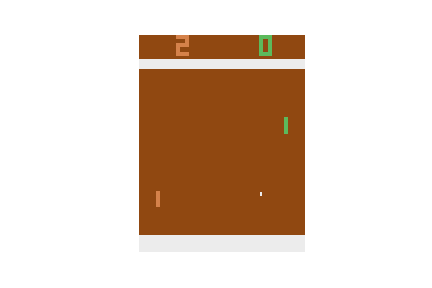
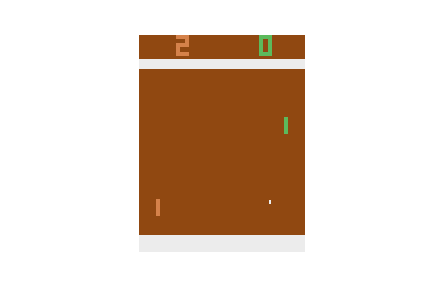
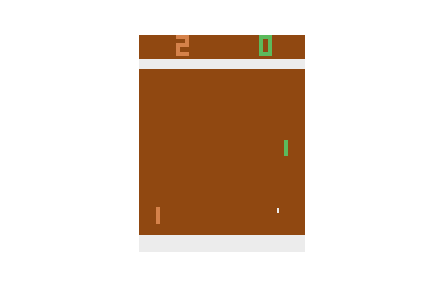
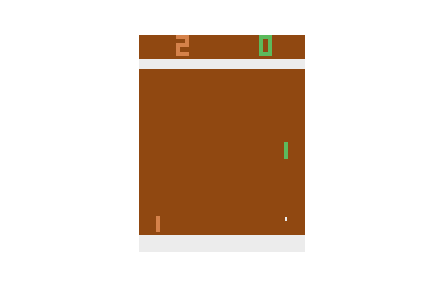
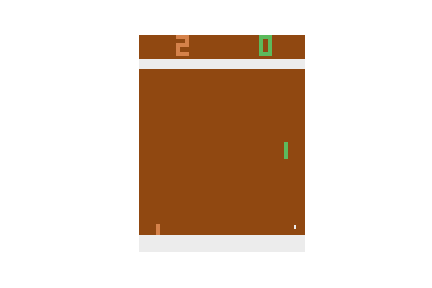
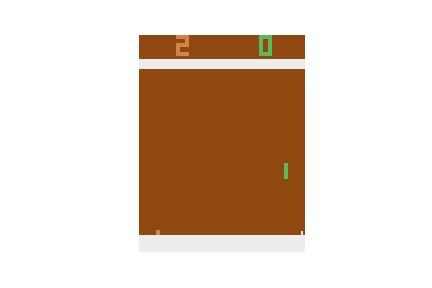
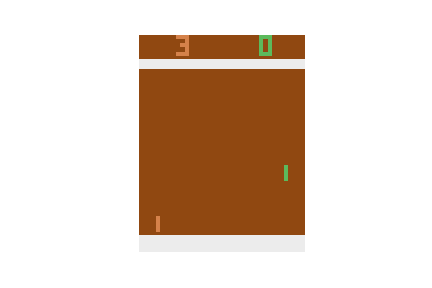
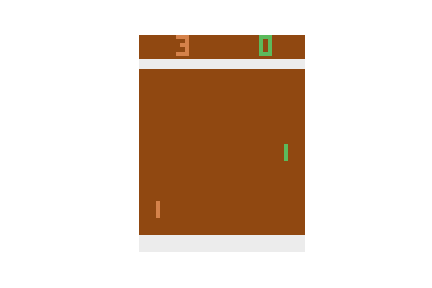
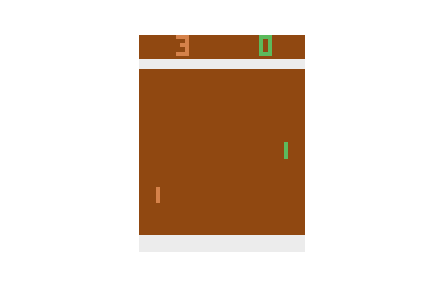
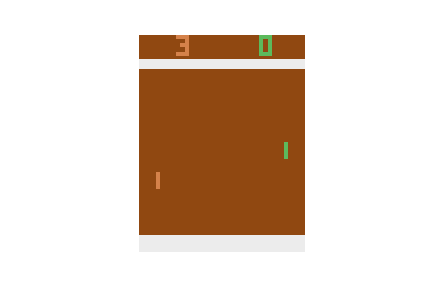
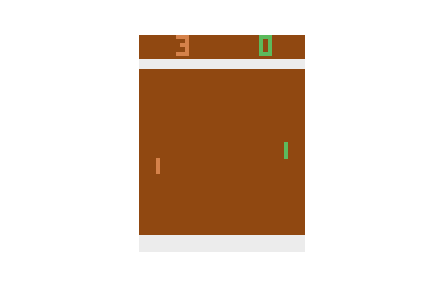
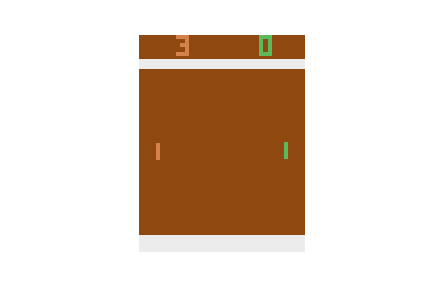
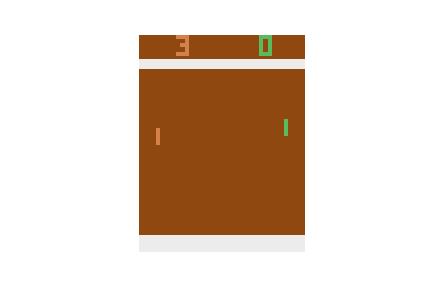
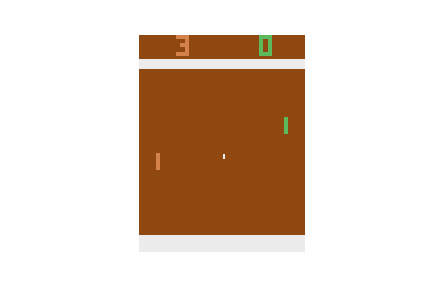
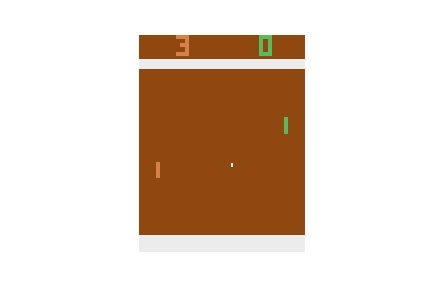
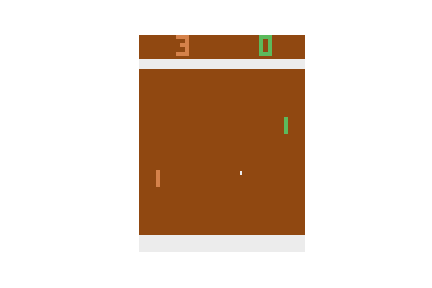
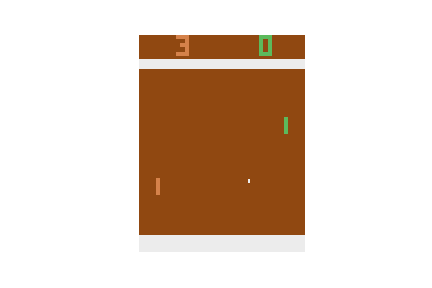
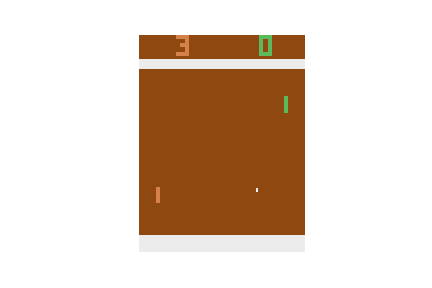
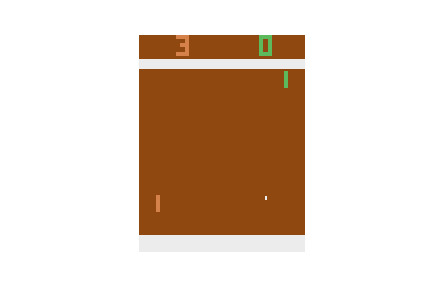
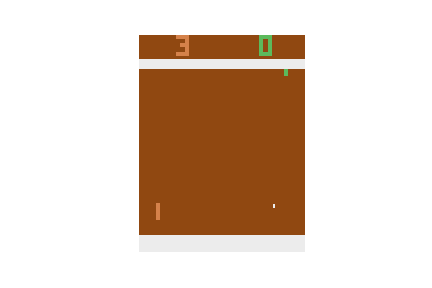
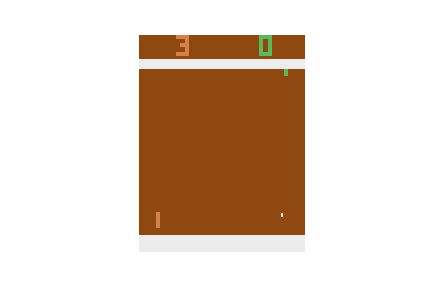
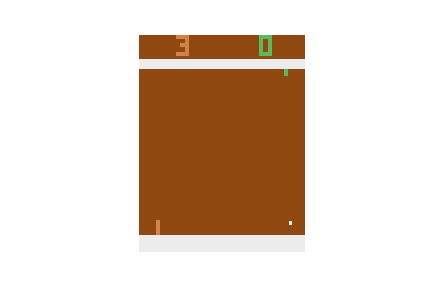
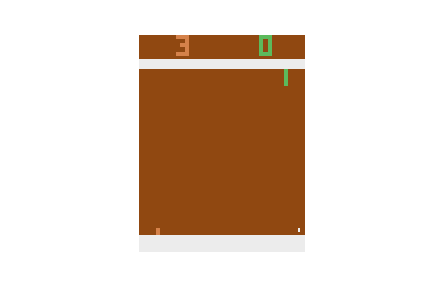
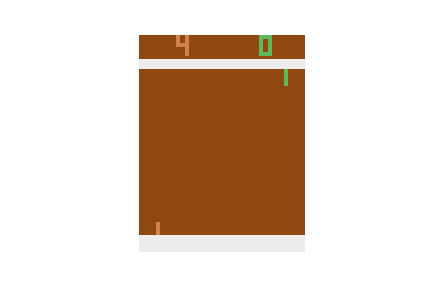
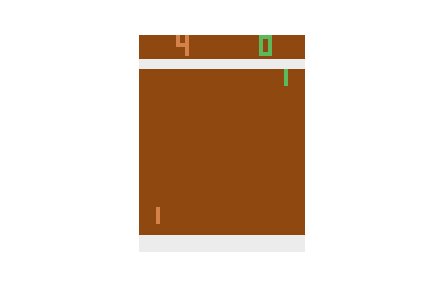
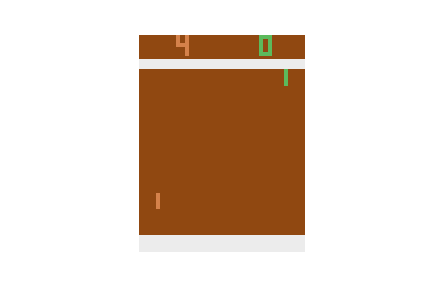
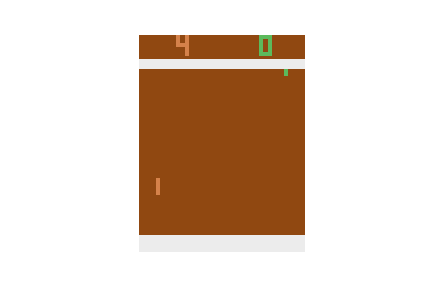
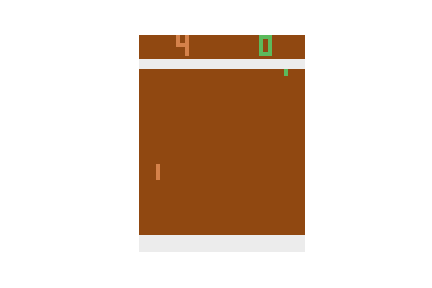
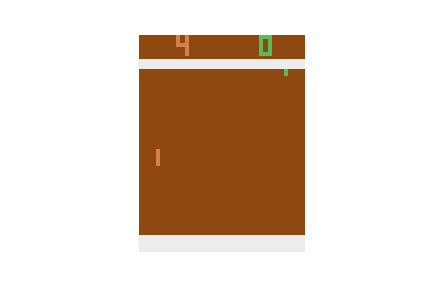
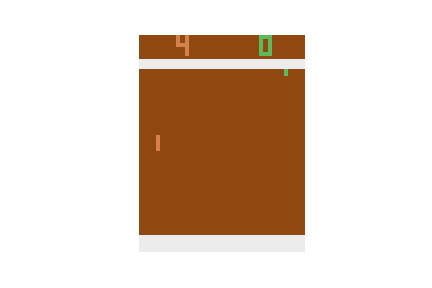
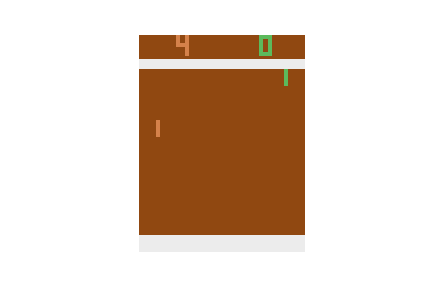
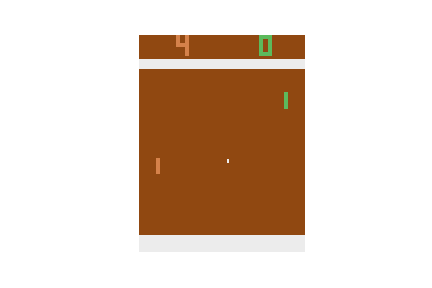
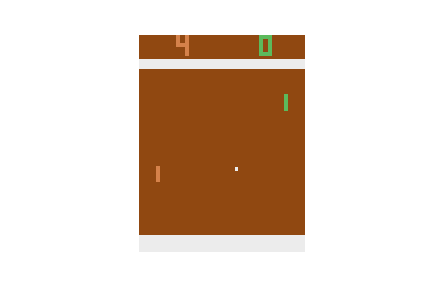
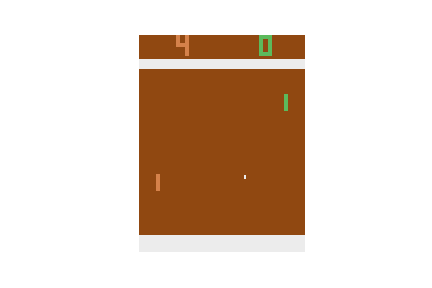
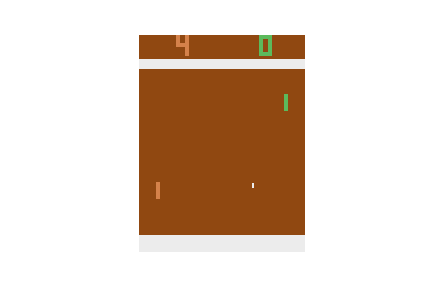
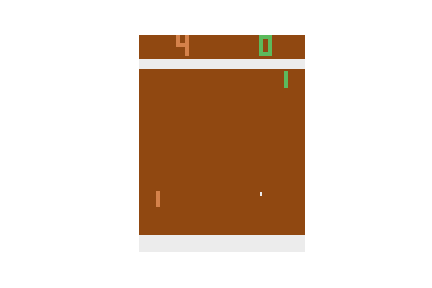
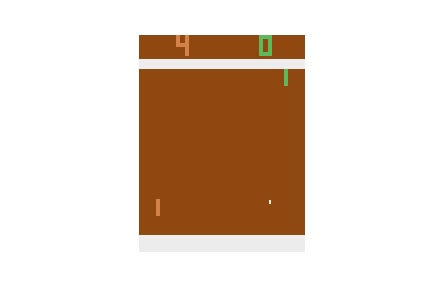
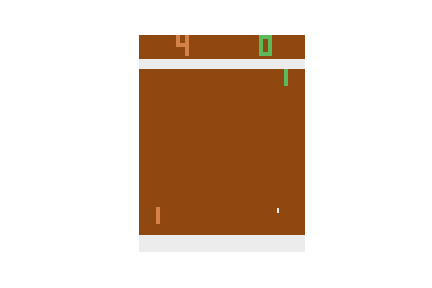
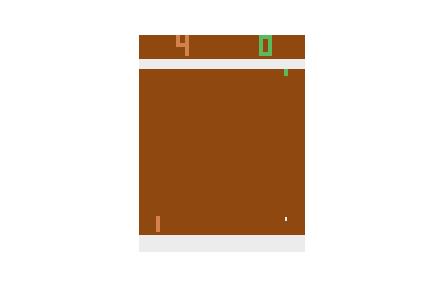
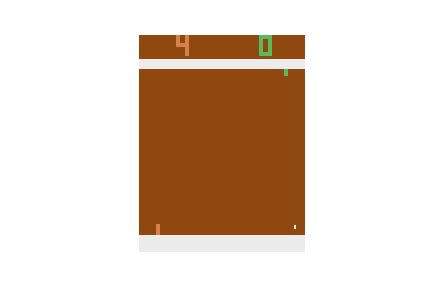
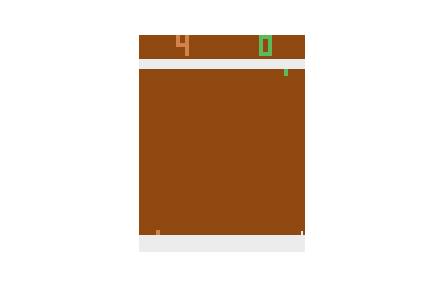
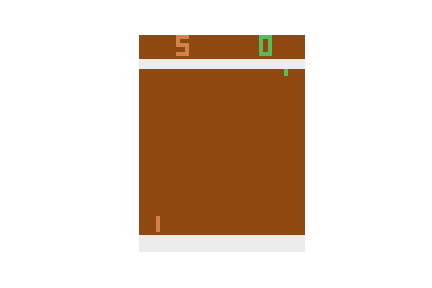
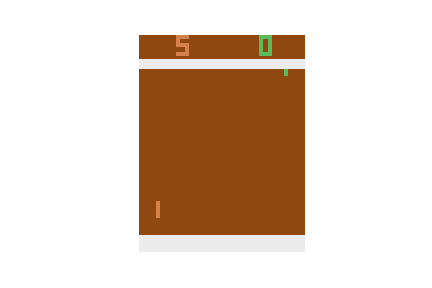
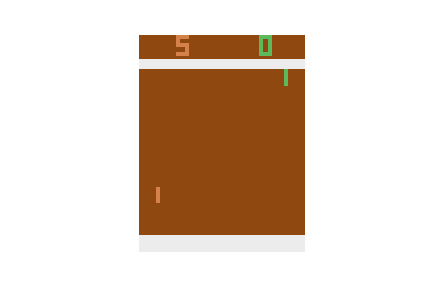
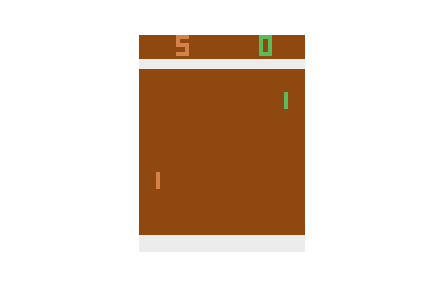
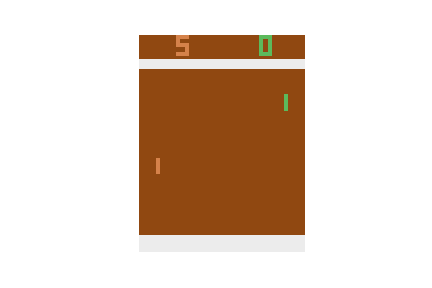
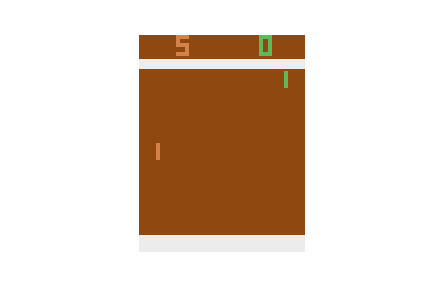
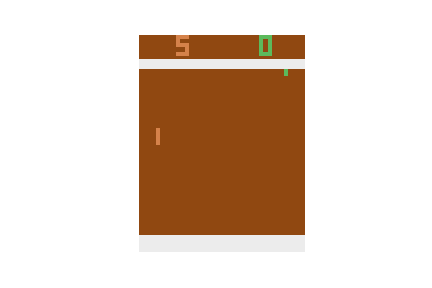
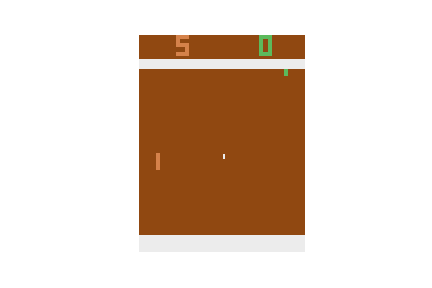
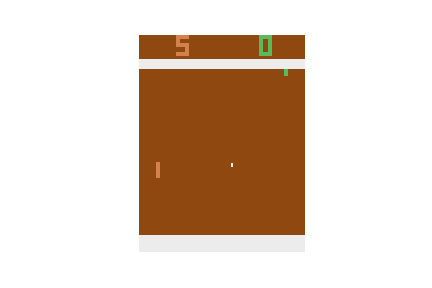
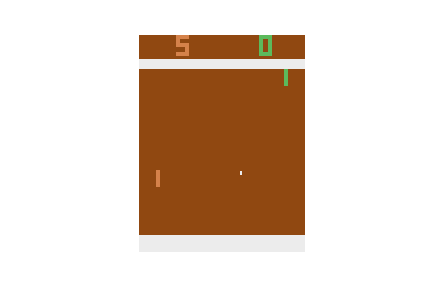
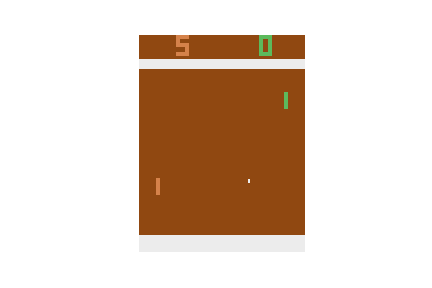
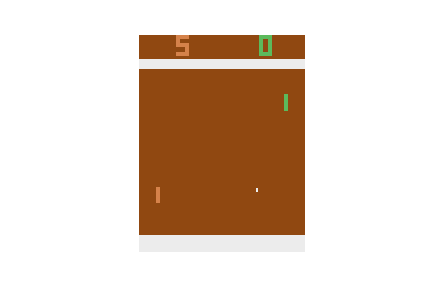
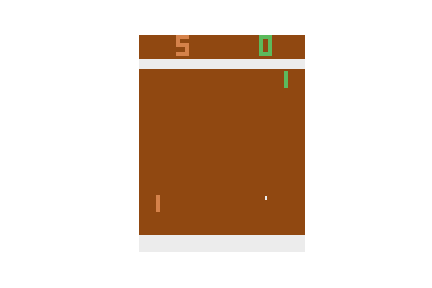
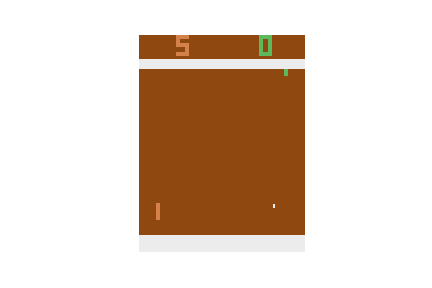
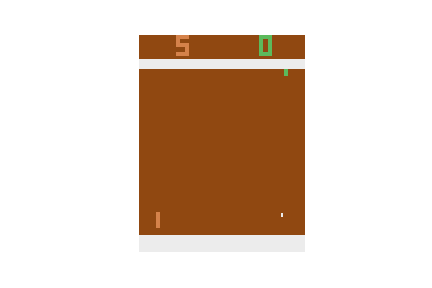
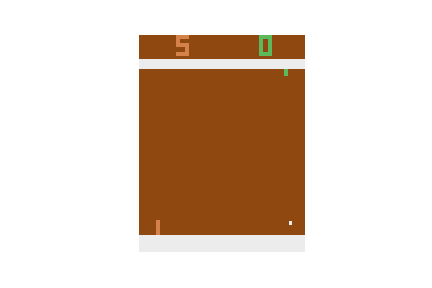
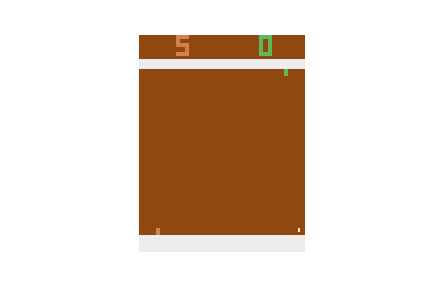
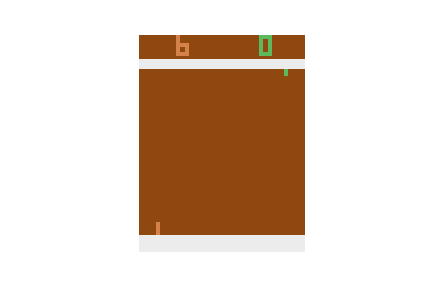
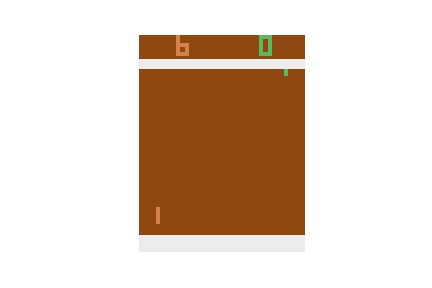
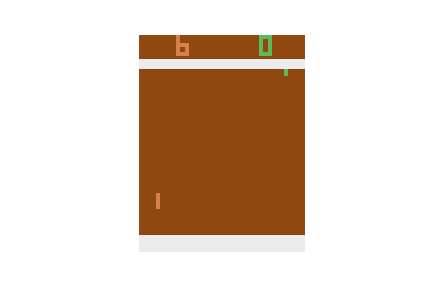
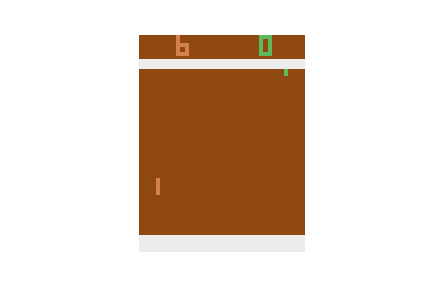
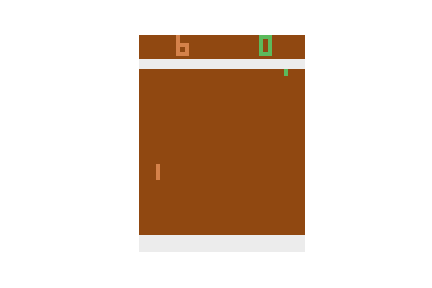
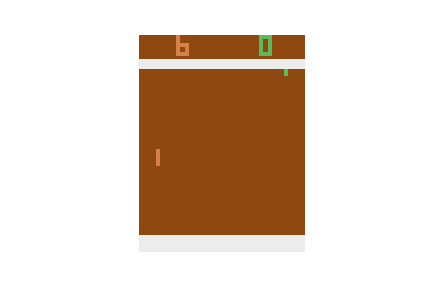
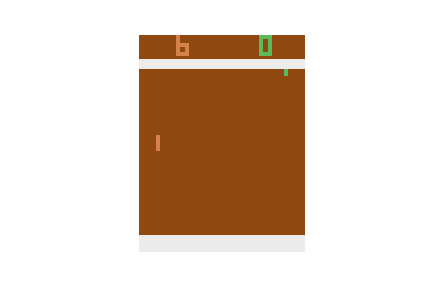
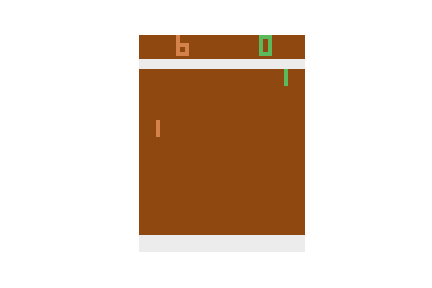
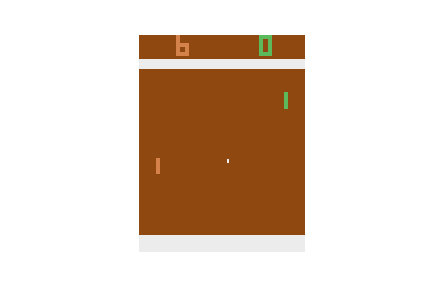
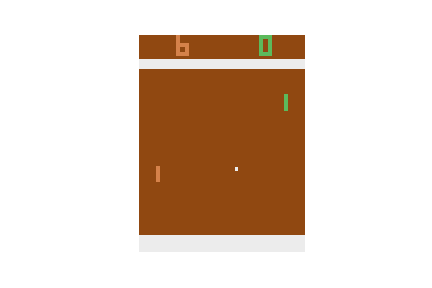
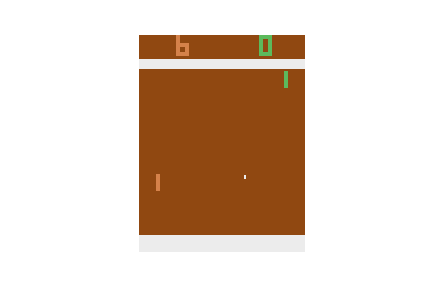
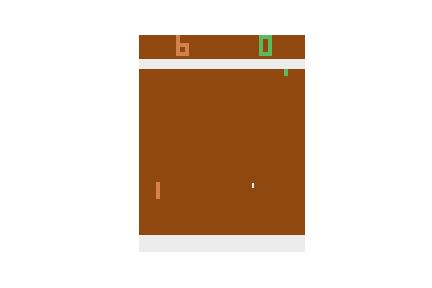
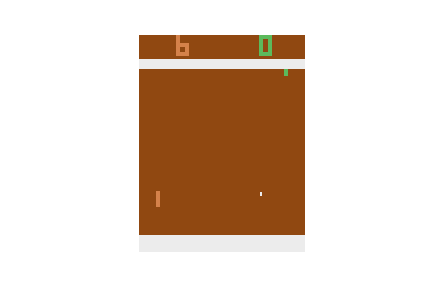
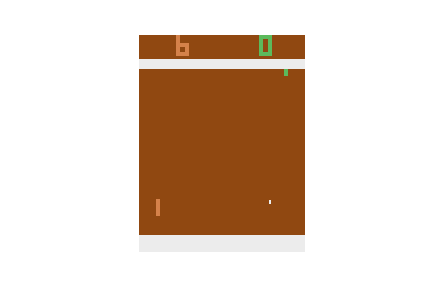
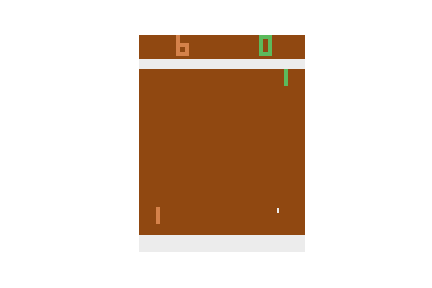
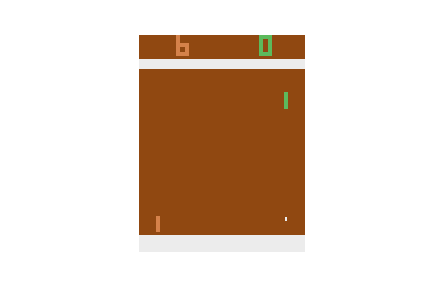
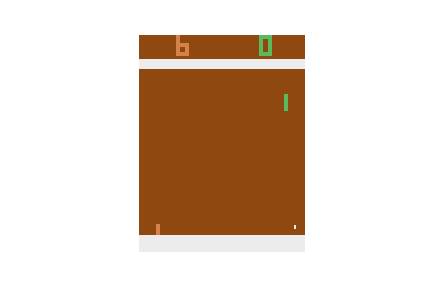
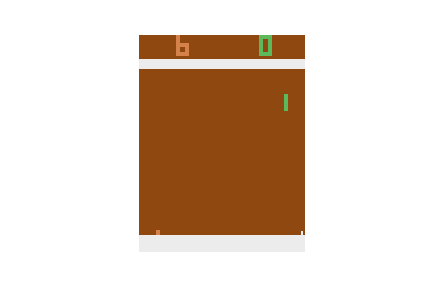
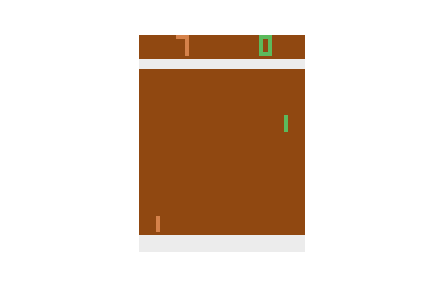
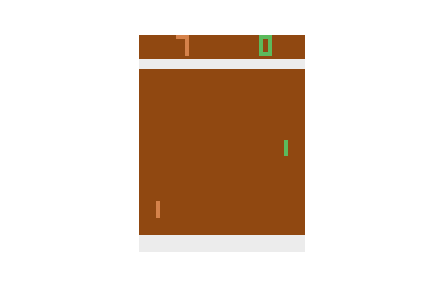
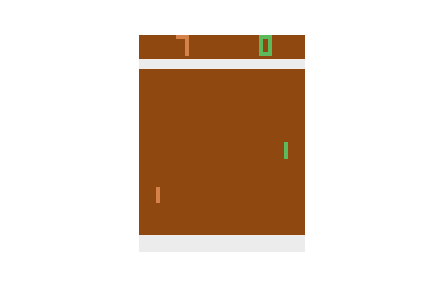
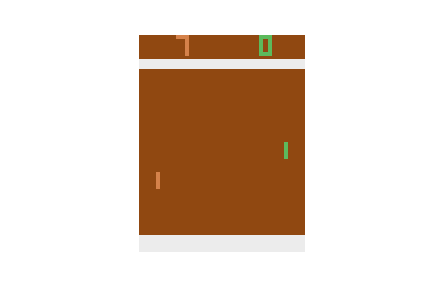
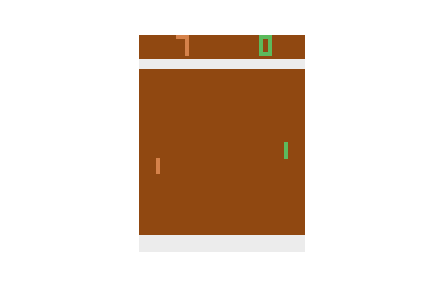
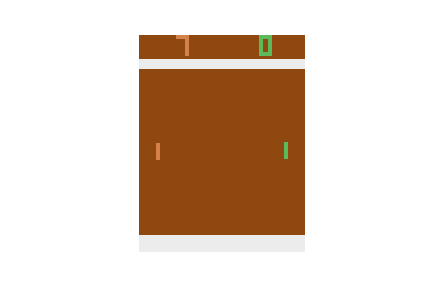
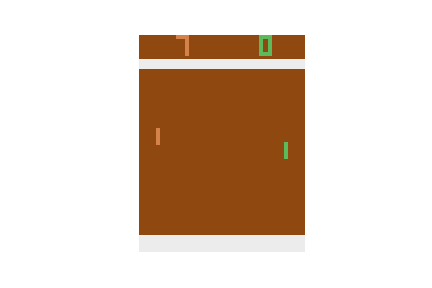
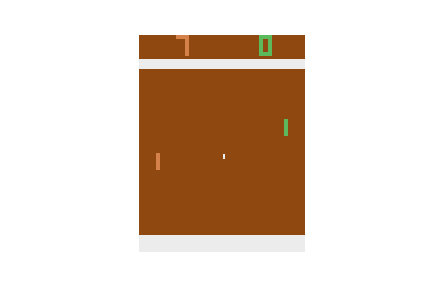
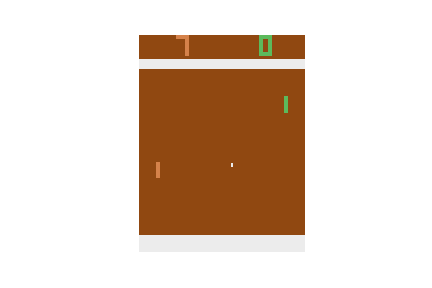
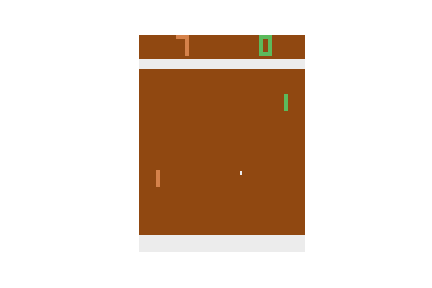
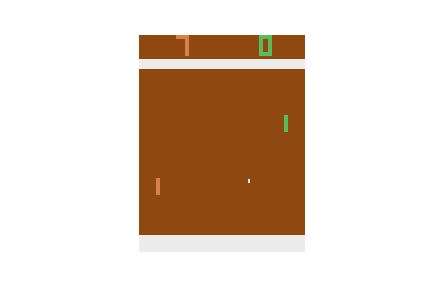
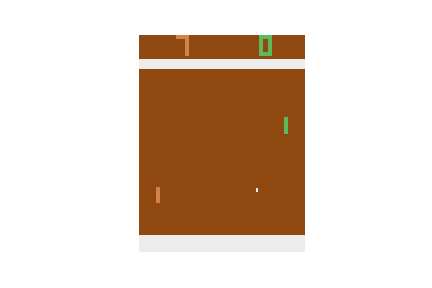
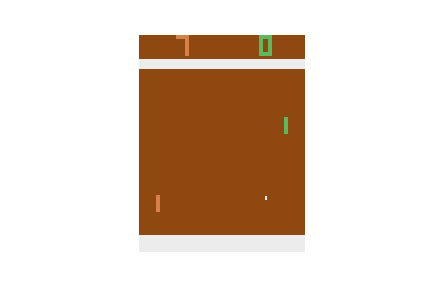
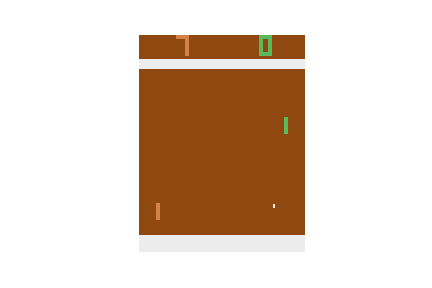
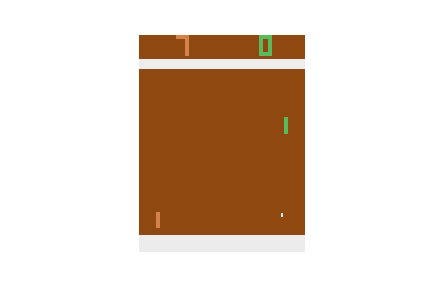
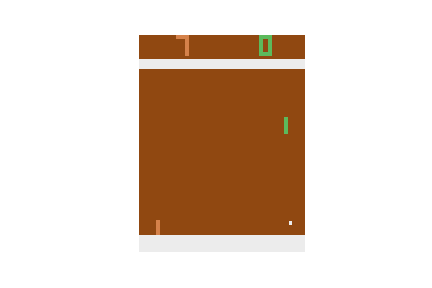
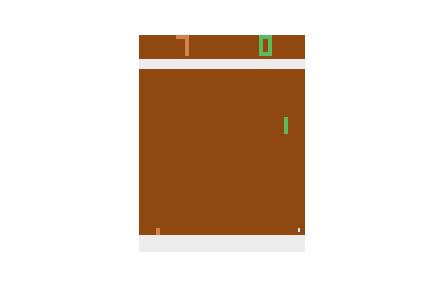
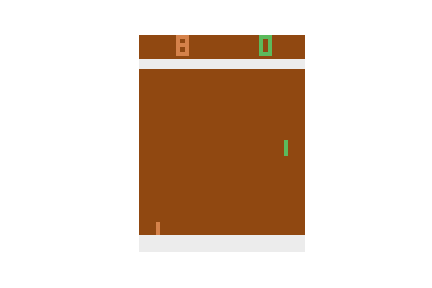
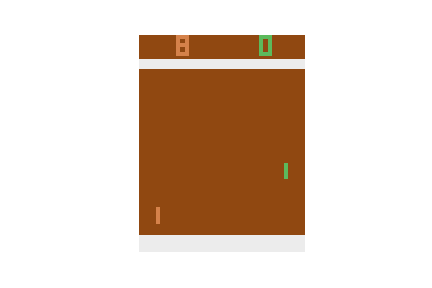
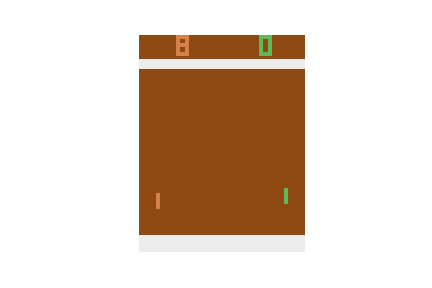
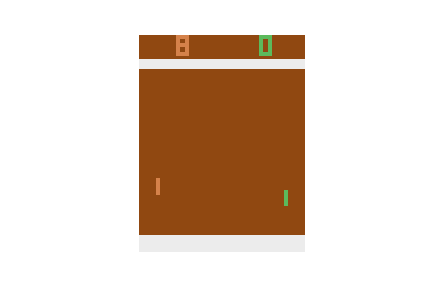
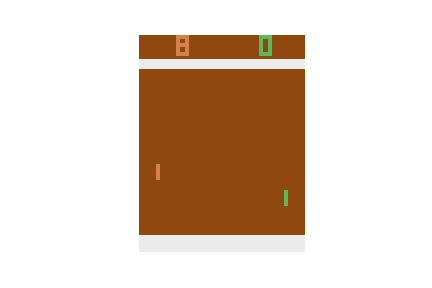
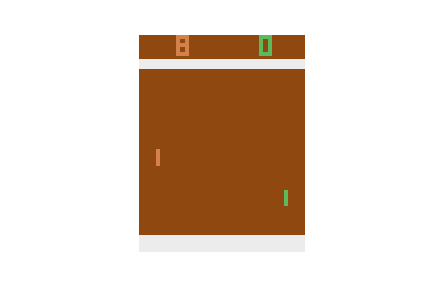
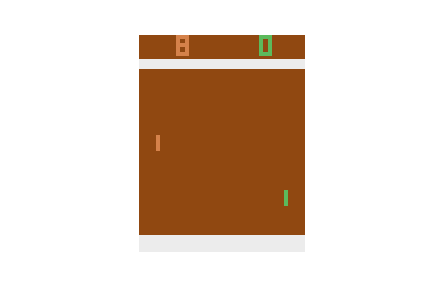
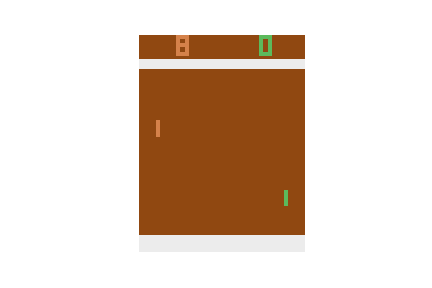
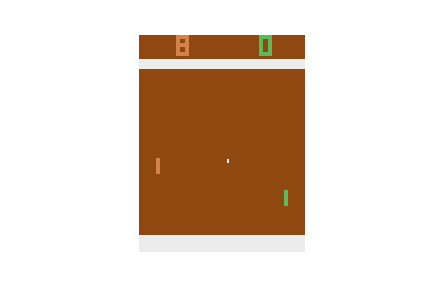
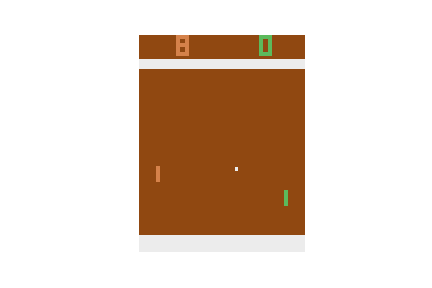
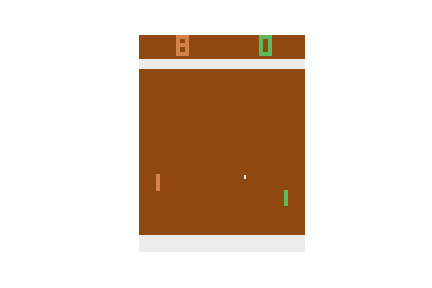
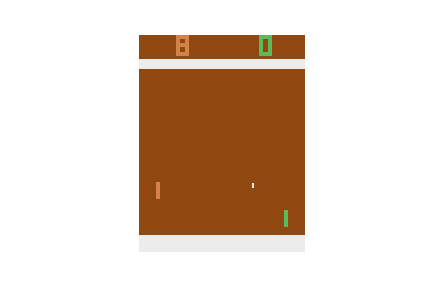
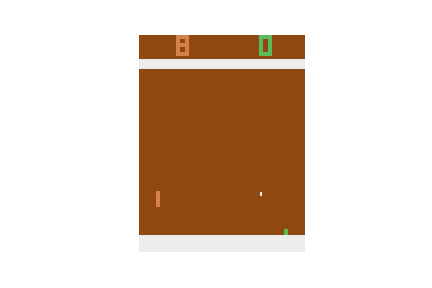
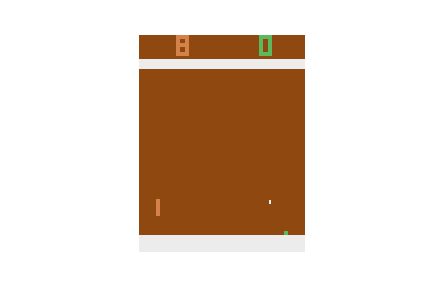
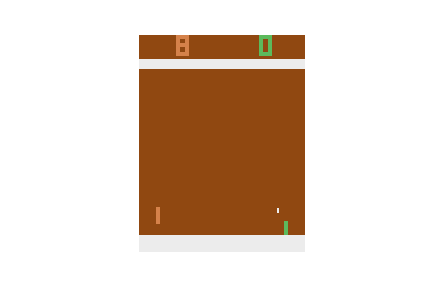
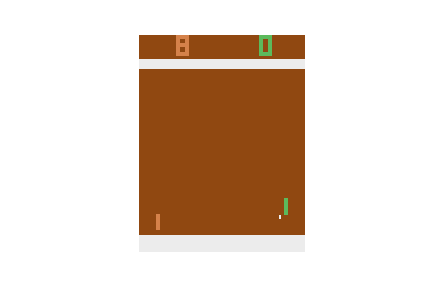
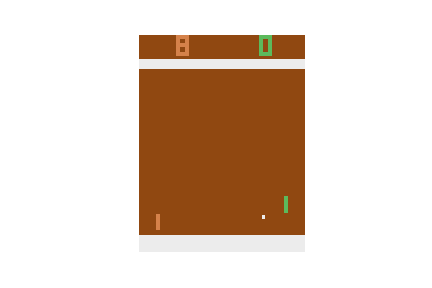
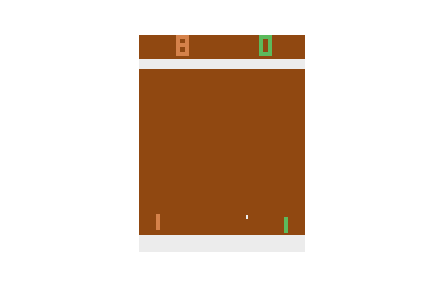
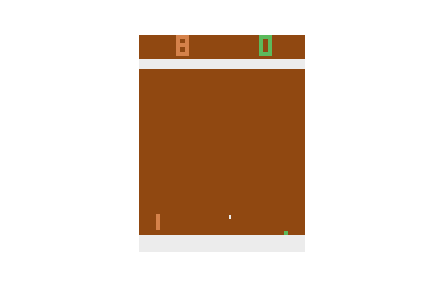
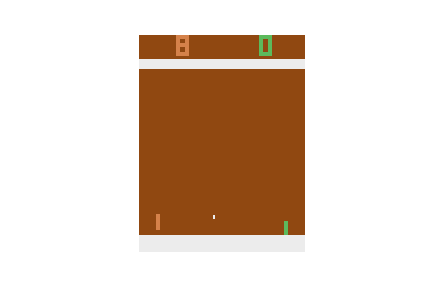
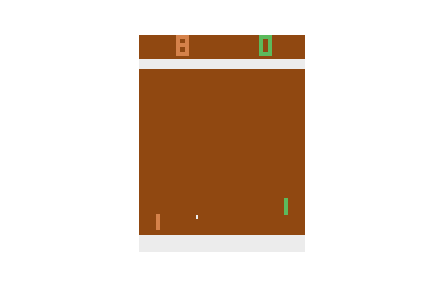
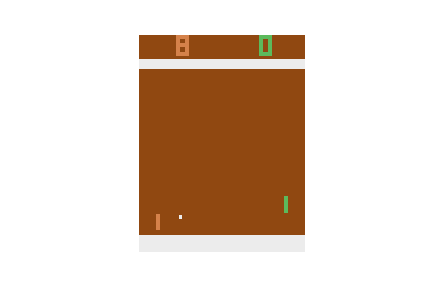
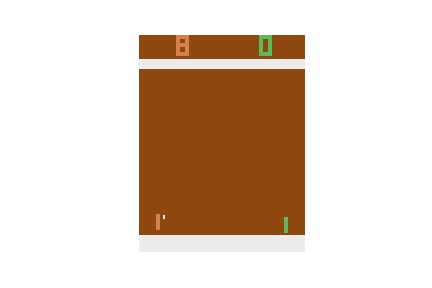
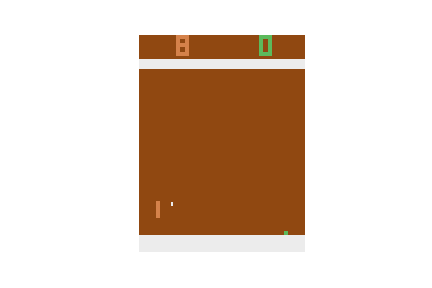
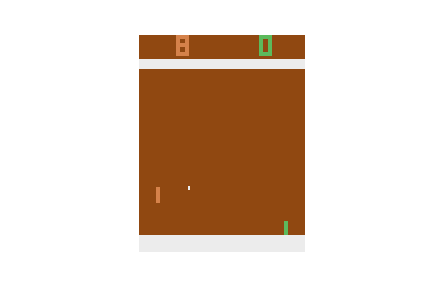
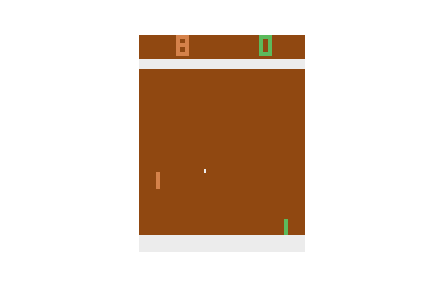
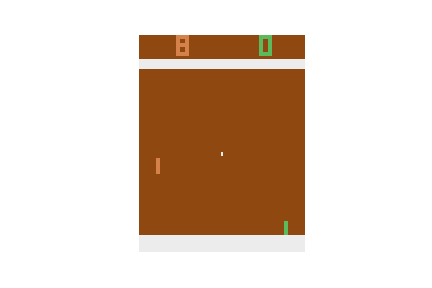
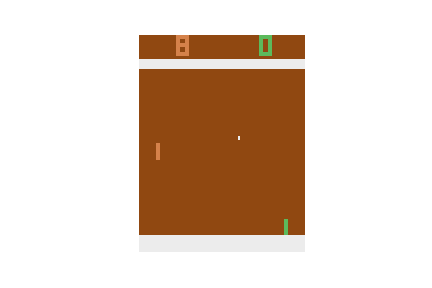
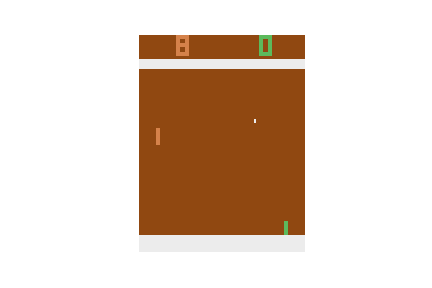
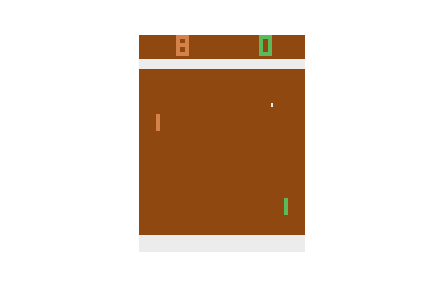
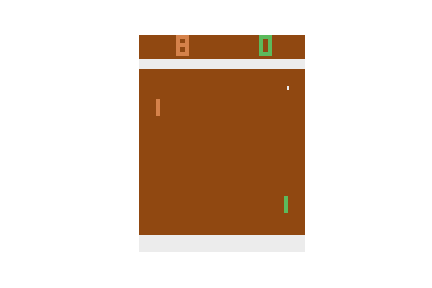
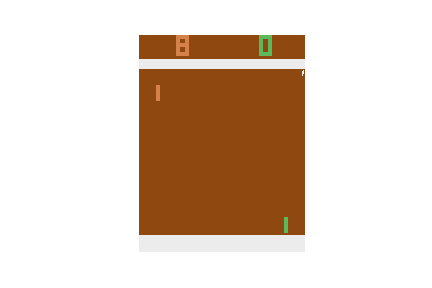
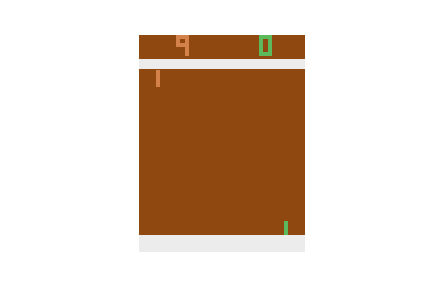
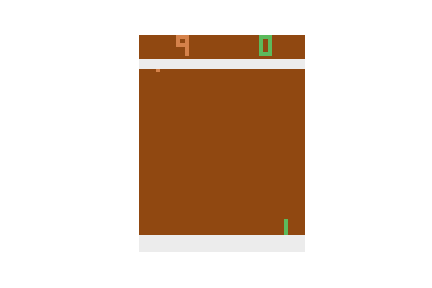
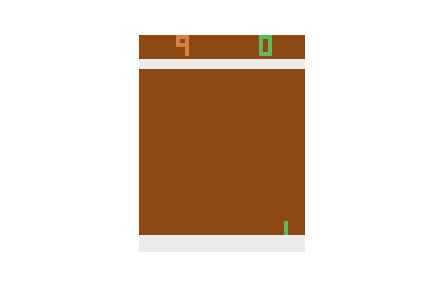
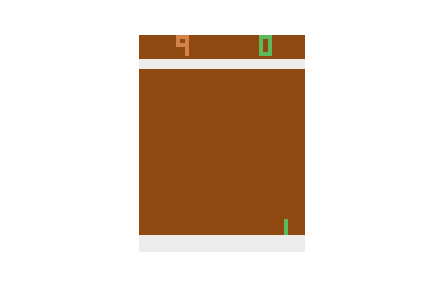
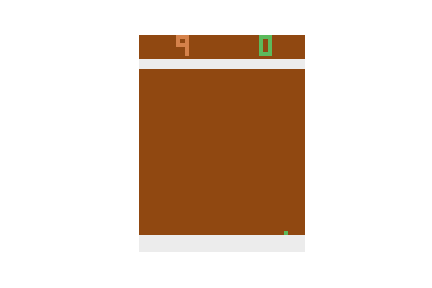
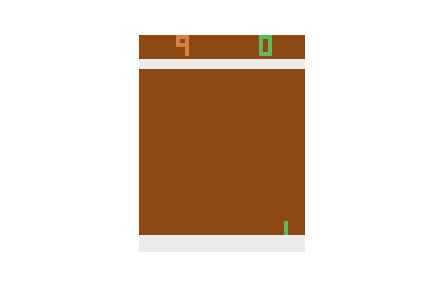
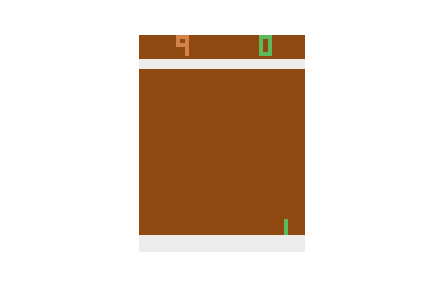
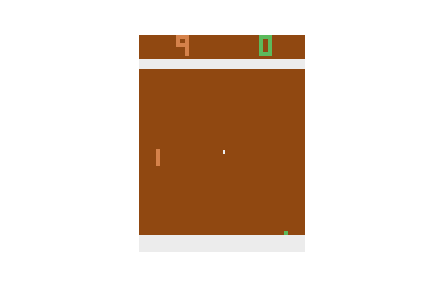
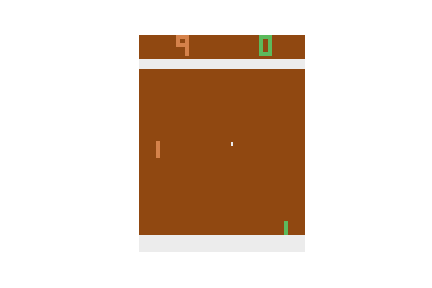
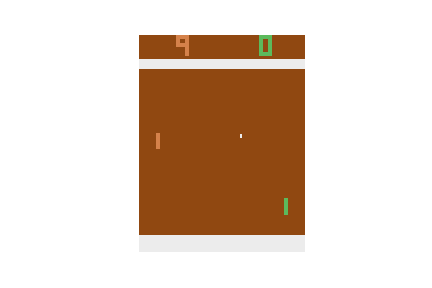
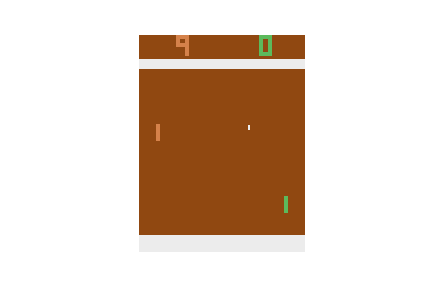
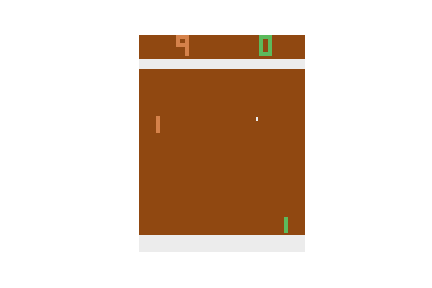
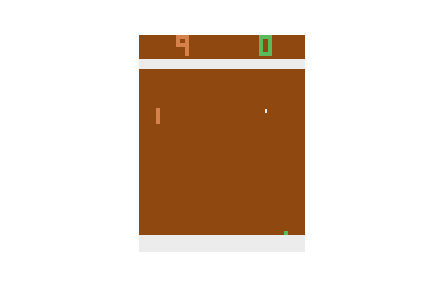
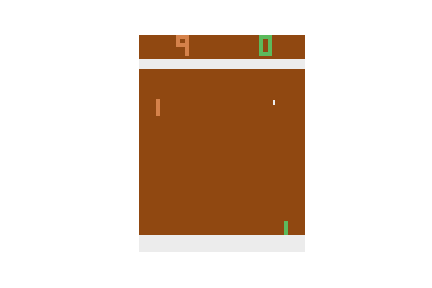
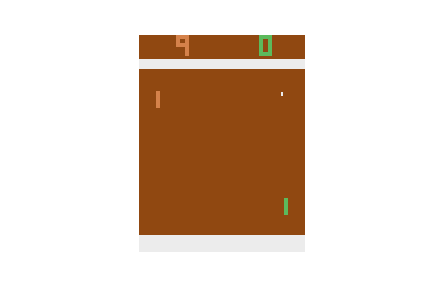
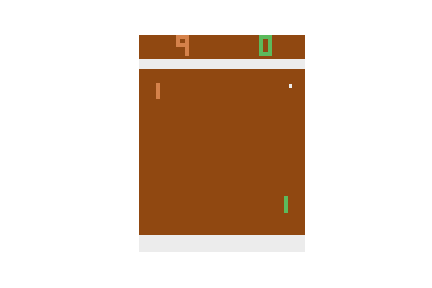
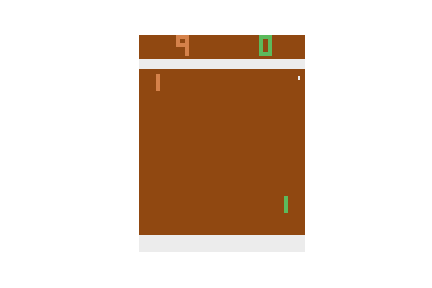
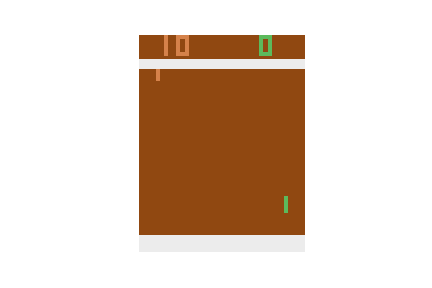
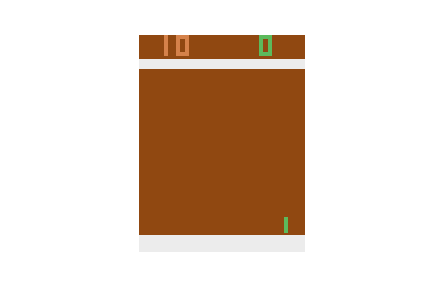

In [6]:
pong_utils.play(env, policy, time=200) 
# try to add the option "preprocess=pong_utils.preprocess_single"
# to see what the agent sees

# Function Definitions
Here you will define key functions for training. 

## Exercise 2: write your own function for training
(what I call scalar function is the same as policy_loss up to a negative sign)

### PPO
Later on, you'll implement the PPO algorithm as well, and the scalar function is given by
$\frac{1}{T}\sum^T_t \min\left\{R_{t}^{\rm future}\frac{\pi_{\theta'}(a_t|s_t)}{\pi_{\theta}(a_t|s_t)},R_{t}^{\rm future}{\rm clip}_{\epsilon}\!\left(\frac{\pi_{\theta'}(a_t|s_t)}{\pi_{\theta}(a_t|s_t)}\right)\right\}$

the ${\rm clip}_\epsilon$ function is implemented in pytorch as ```torch.clamp(ratio, 1-epsilon, 1+epsilon)```

In [9]:
def clipped_surrogate(policy, old_probs, states, actions, rewards,
                      discount = 0.995, epsilon=0.1, beta=0.01):

    ########
    ## 
    ## WRITE YOUR OWN CODE HERE
    ##
    ########
    discounts=discount**np.arange(len(rewards))
    Reward=np.asarray(rewards)*discounts[:,np.newaxis]
    
    Reward_future=Reward[::-1].cumsum(axis=0)[::-1]

    R_mean=Reward_future.mean(axis=1)
    R_std=Reward_future.std(axis=1)+1e-10
    
    reward_normalized=(Reward_future-R_mean[:,np.newaxis])/R_std[:,np.newaxis]
    
    
    
    actions = torch.tensor(actions, dtype=torch.int8, device=device)
    old_probs = torch.tensor(old_probs, dtype=torch.float,device=device)
    rewards=torch.tensor(reward_normalized, dtype=torch.float, device=device)


    # convert states to policy (or probability)
    new_probs = pong_utils.states_to_prob(policy, states)
    new_probs = torch.where(actions == pong_utils.RIGHT, new_probs, 1.0-new_probs)
    
    ratio=new_probs/old_probs
    clip=torch.clamp(ratio,1-epsilon,1+epsilon)

    
    # include a regularization term
    # this steers new_policy towards 0.5
    # prevents policy to become exactly 0 or 1 helps exploration
    # add in 1.e-10 to avoid log(0) which gives nan
    entropy = -(new_probs*torch.log(old_probs+1.e-10)+ \
        (1.0-new_probs)*torch.log(1.0-old_probs+1.e-10))

    return torch.mean(beta*entropy+torch.min(rewards*ratio,rewards*clip))


# Training
We are now ready to train our policy!
WARNING: make sure to turn on GPU, which also enables multicore processing. It may take up to 45 minutes even with GPU enabled, otherwise it will take much longer!

In [ ]:
from parallelEnv import parallelEnv
import numpy as np
# keep track of how long training takes
# WARNING: running through all 800 episodes will take 30-45 minutes

# training loop max iterations
episode = 500

# widget bar to display progress
!pip install progressbar
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=episode).start()


envs = parallelEnv('PongDeterministic-v4', n=8, seed=1234)

discount_rate = .99
epsilon = 0.1
beta = .01
tmax = 320
SGD_epoch = 4

# keep track of progress
mean_rewards = []

for e in range(episode):

    # collect trajectories
    old_probs, states, actions, rewards = \
        pong_utils.collect_trajectories(envs, policy, tmax=tmax)
        
    total_rewards = np.sum(rewards, axis=0)


    # gradient ascent step
    for _ in range(SGD_epoch):
        
        # uncomment to utilize your own clipped function!
        L = -clipped_surrogate(policy, old_probs, states, actions, rewards, epsilon=epsilon, beta=beta)

#         L = -pong_utils.clipped_surrogate(policy, old_probs, states, actions, rewards,
#                                           epsilon=epsilon, beta=beta)
        optimizer.zero_grad()
        L.backward()
        optimizer.step()
        del L
    
    # the clipping parameter reduces as time goes on
    epsilon*=.999
    
    # the regulation term also reduces
    # this reduces exploration in later runs
    beta*=.995
    
    # get the average reward of the parallel environments
    mean_rewards.append(np.mean(total_rewards))
    
    # display some progress every 20 iterations
    if (e+1)%20 ==0 :
        print("Episode: {0:d}, score: {1:f}".format(e+1,np.mean(total_rewards)))
        print(total_rewards)
        
    # update progress widget bar
    timer.update(e+1)
    
timer.finish()

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "c:\users\1\anaconda3\envs\qb_ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2672, in version
    return self._version
  File "c:\users\1\anaconda3\envs\qb_ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _version

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\1\anaconda3\envs\qb_ml\lib\site-packages\pip\_internal\commands\install.py", line 524, in _warn_about_conflicts
    package_set, _dep_info = check_install_conflicts(to_install)
  File "c:\users\1\anaconda3\envs\qb_ml\lib\site-packages\pip\_internal\operations\check.py", line 108, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
  File "c:\users\1\anaconda3\envs\qb_ml\lib\site-packages\pip\_internal\operations\check.py", line 47, in create_pac

Episode: 20, score: -13.625000
[-12. -10. -15. -16. -14. -15. -14. -13.]


Episode: 40, score: -15.250000
[-13. -17. -15. -16. -16. -15. -16. -14.]


Episode: 60, score: -14.000000
[-14. -15. -15. -15. -14. -11. -13. -15.]


Episode: 80, score: -13.250000
[-15. -16.  -8. -15. -14. -12. -10. -16.]


Episode: 100, score: -14.125000
[-14. -16. -16. -13. -13. -16. -10. -15.]


Episode: 120, score: -12.500000
[-14. -10. -15. -11.  -8. -14. -15. -13.]


Episode: 140, score: -13.625000
[-13. -14. -16. -16. -10. -16. -14. -10.]


Episode: 160, score: -10.750000
[ -9. -13.  -8. -11. -12. -13.  -8. -12.]


Episode: 180, score: -11.125000
[-12.  -8. -15. -10.  -8. -11. -12. -13.]


Episode: 200, score: -9.750000
[-12. -10. -11.  -9.  -7.  -9.  -8. -12.]


Episode: 220, score: -10.375000
[-11. -10.  -9. -11.  -9.  -8. -14. -11.]


Episode: 240, score: -6.625000
[-6. -6. -6. -6. -7. -8. -7. -7.]


In [ ]:
pong_utils.play(env, policy, time=200) 

In [ ]:
# save your policy!
torch.save(policy, 'PPO.policy')

# load policy if needed
# policy = torch.load('PPO.policy')

# try and test out the solution 
# make sure GPU is enabled, otherwise loading will fail
# (the PPO verion can win more often than not)!
#
# policy_solution = torch.load('PPO_solution.policy')
# pong_utils.play(env, policy_solution, time=2000) 